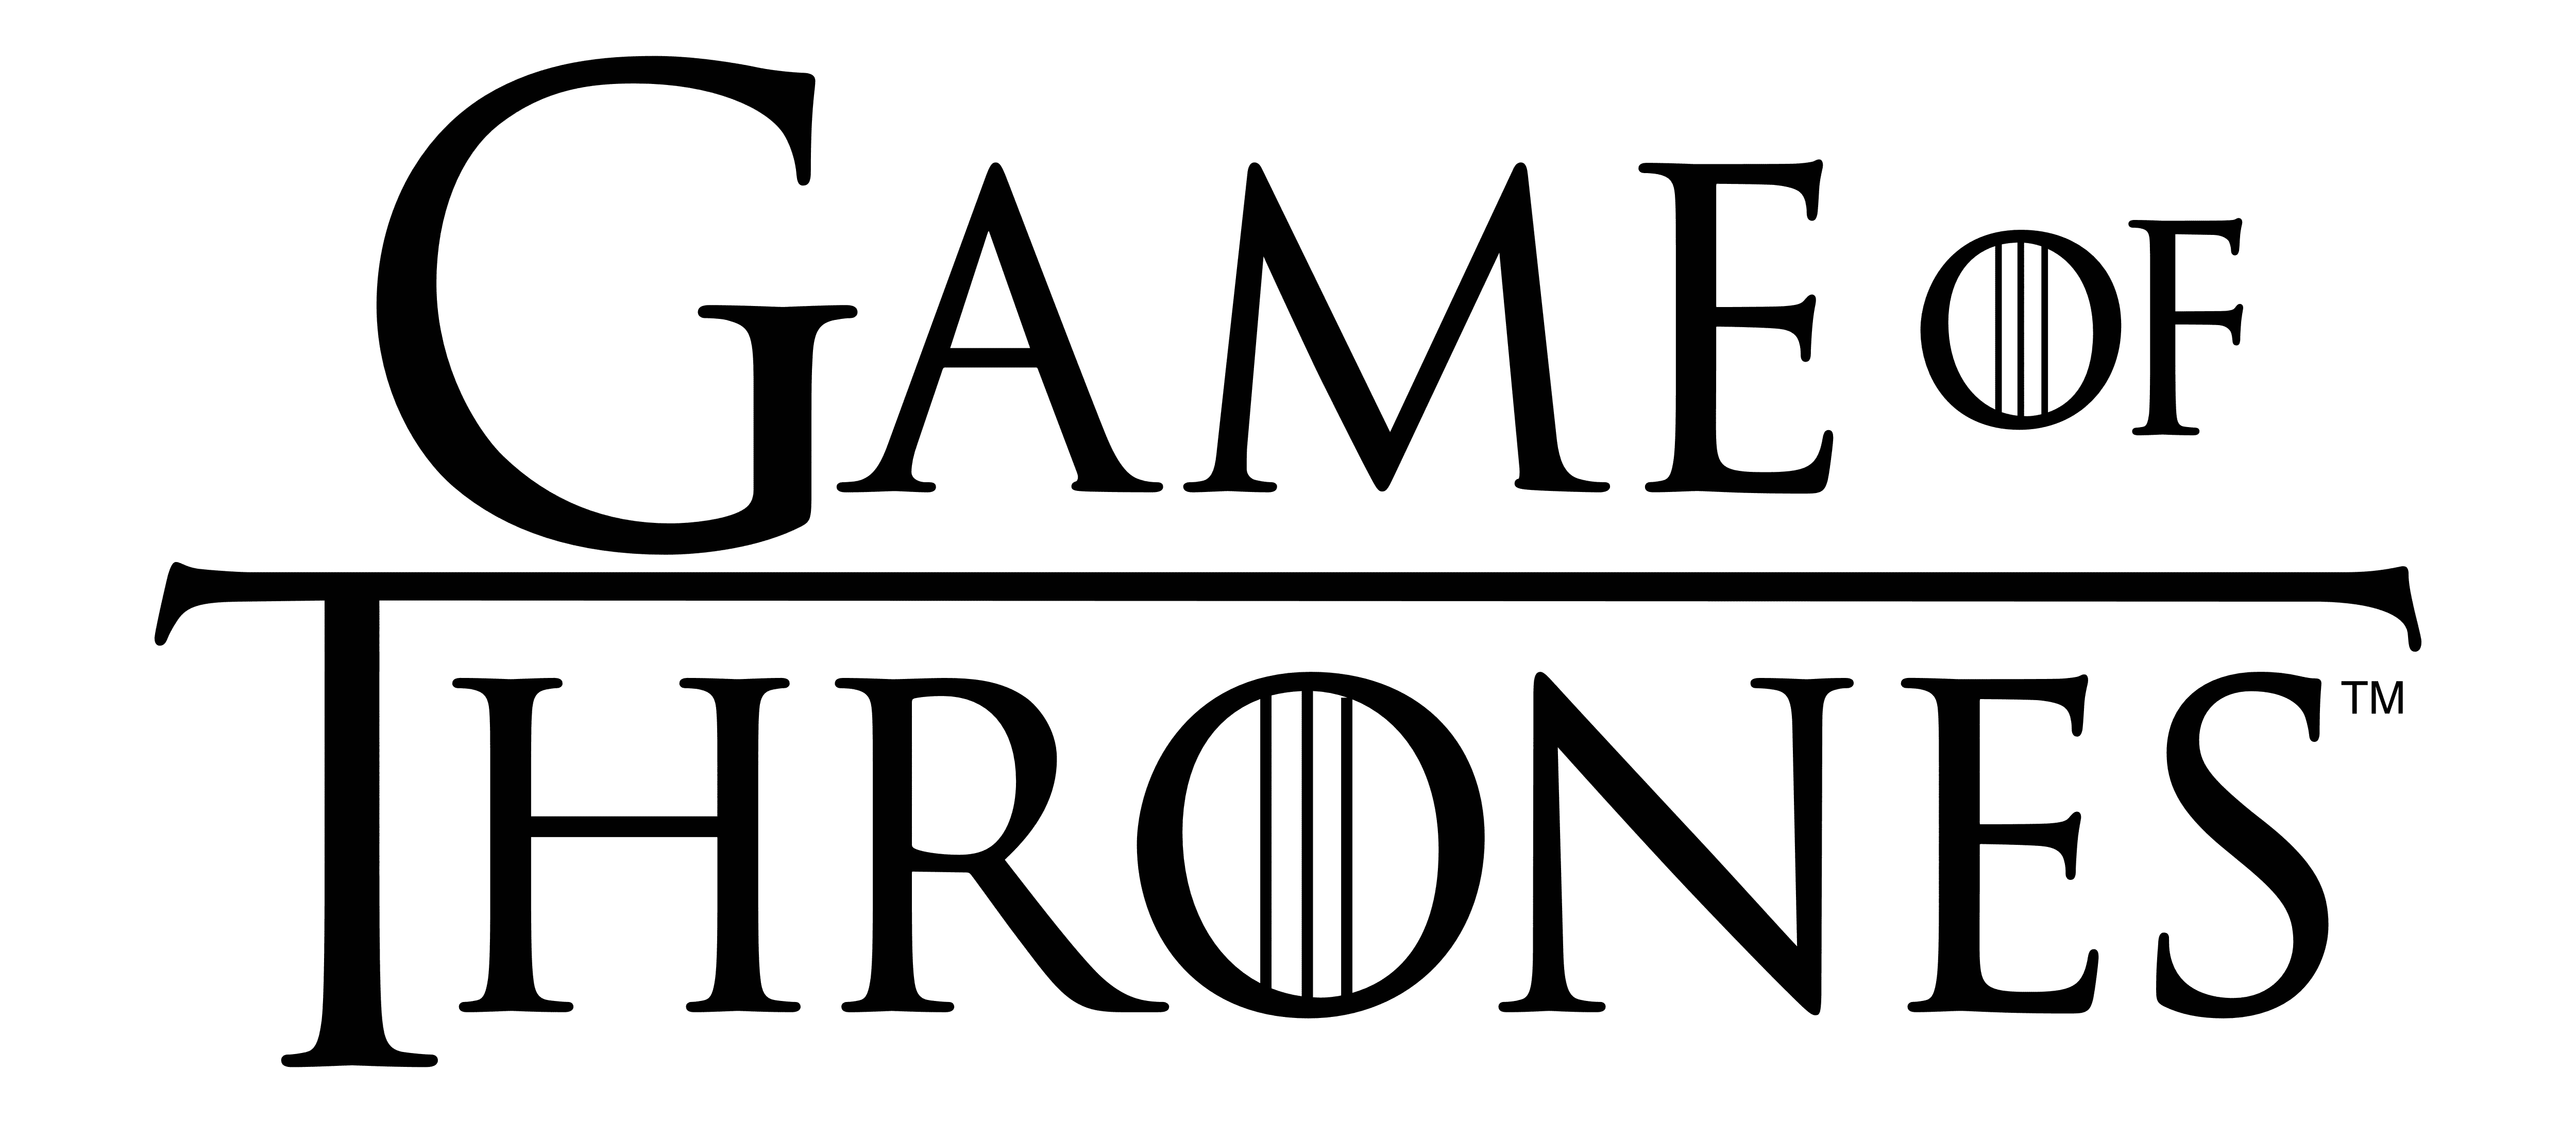
**Game of Thrones** is an American fantasy television series based on the novel _"A Song of Ice and Fire”_ by **George R. R. Martin**. The series depicts the brutal dynastic struggles between the noble families of the kingdom for control of the Iron Throne. Although the series is set in a fantasy world, its narrative contains elements of political intrigue, character complexity and moral ambiguity.

The series debuted on HBO in April 2011 and ended in May 2019, spanning eight seasons and 73 episodes. It has become one of the biggest TV series in the world, known for its ambitious plot, complex characters and willingness to kill off major characters unexpectedly. _Game of Thrones_ has been praised for its production values and its ability to bring Martin's richly imagined world to life, though it has also faced criticism for its handling of some plots and characters in later seasons.

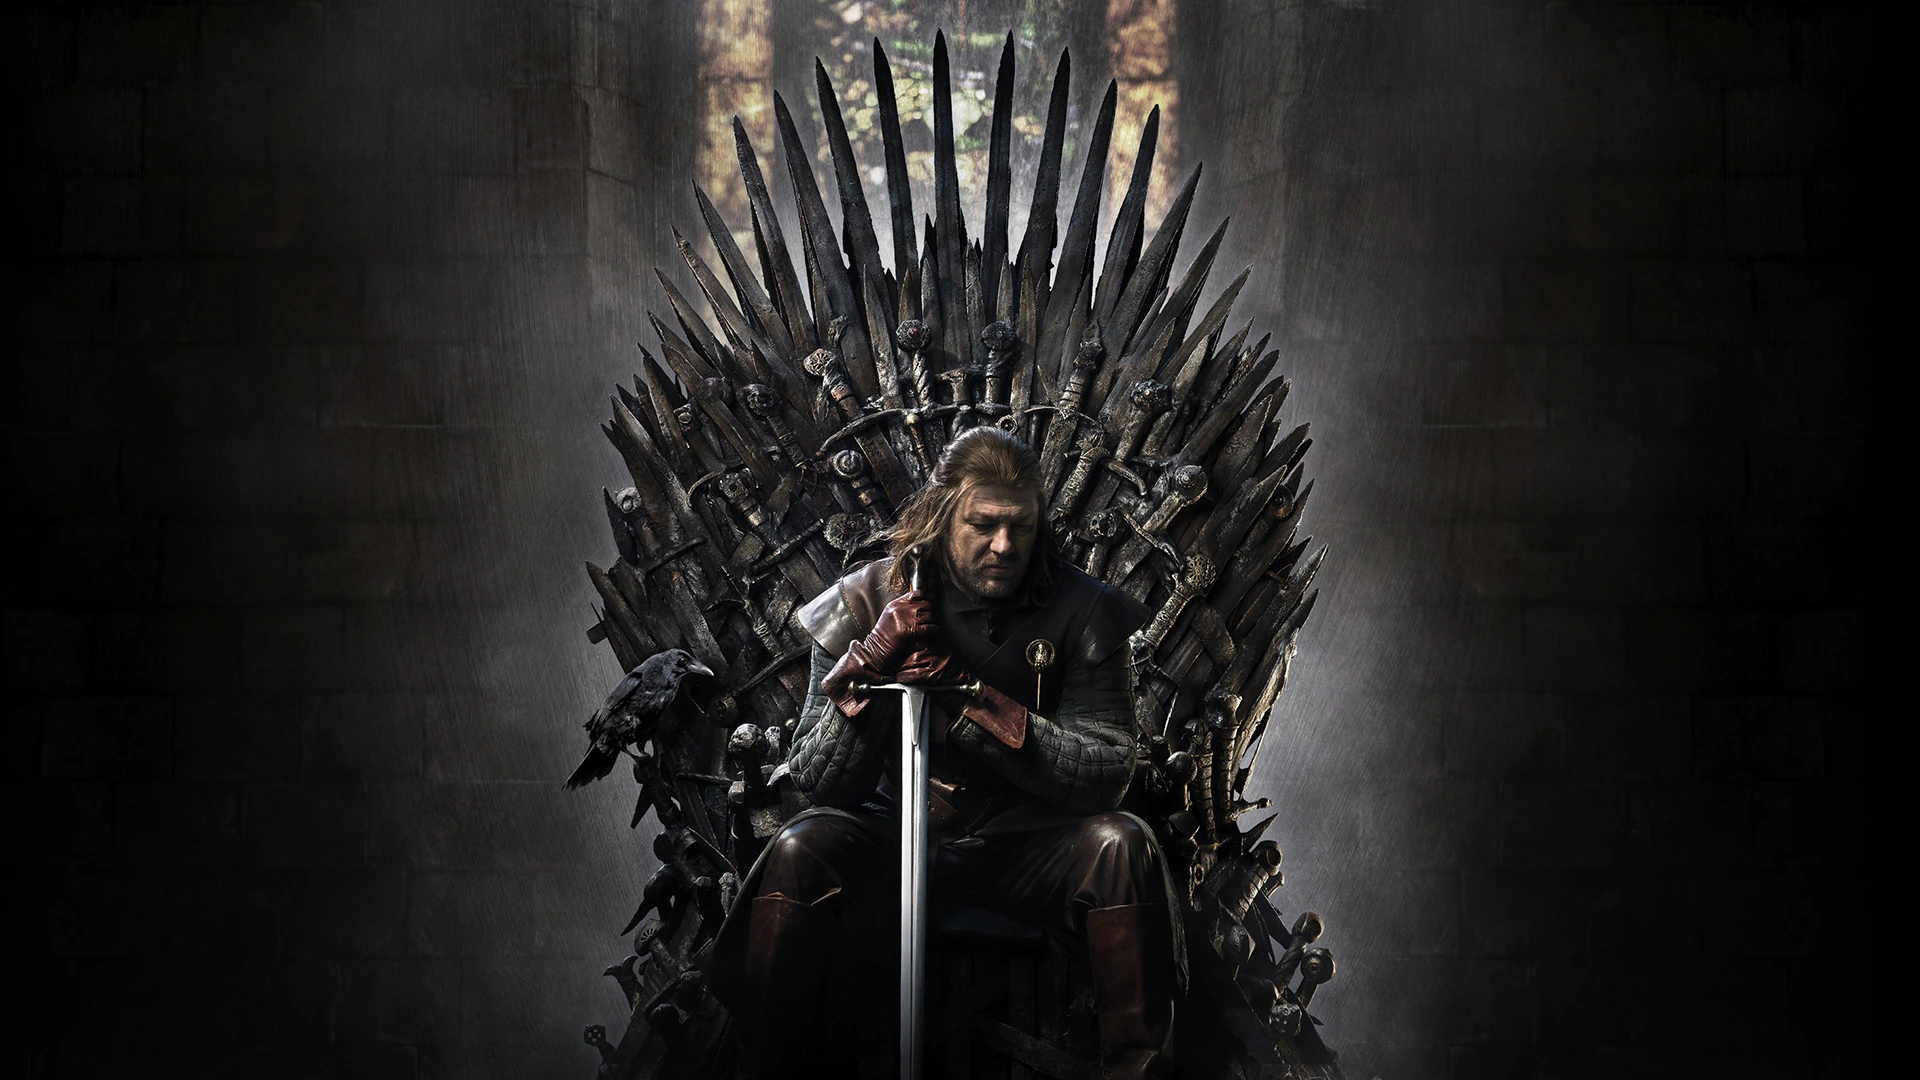


## Data scraping and loading

The first step in this project is to scrape the data from the web. We will scrape the data from the [Game of Thrones Wikipedia list](https://en.wikipedia.org/wiki/List_of_Game_of_Thrones_episodes) using the `BeautifulSoup` library in Python. The data will be stored in a CSV file for further analysis.

The data will contain the following columns:
- `Season`: The season number.
- `No_overall`: The episode number.
- `No_in_season`: The episode number in the season.
- `Title`: The title of the episode.
- `Directed_by`: The director of the episode.
- `Written_by`: The writer of the episode.
- `Air_date`: The date the episode aired.
- `Viewers`: The number of viewers in millions.

In [17]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://en.wikipedia.org/wiki/List_of_Game_of_Thrones_episodes"

response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

episode_tables = soup.find_all(
    "table", class_="wikitable plainrowheaders wikiepisodetable"
)

episodes = []
ep_num = 1
season_num = 1

for table in episode_tables:
    headers = []
    rows = table.find_all("tr")

    for header in rows[0].find_all("th"):
        headers.append(header.text.strip())

    for row in rows[1:]:
        cells = row.find_all("td")
        if len(cells) > 4:
            episode_data = {}
            episode_data["Season"] = season_num
            episode_data["No_overall"] = ep_num
            ep_num += 1
            episode_data["No_In_Season"] = cells[0].text.strip()
            title_cell = cells[1].text.strip()
            episode_data["Title"] = (
                title_cell.split('"')[1].strip() if '"' in title_cell else title_cell
            )
            episode_data["Directed_by"] = cells[2].text.strip()
            episode_data["Written_by"] = cells[3].text.strip()
            episode_data["Air_date"] = cells[4].text.strip()
            viewers_text = cells[5].text.strip()
            episode_data["Viewers"] = viewers_text.split("[")[0].strip()
            episodes.append(episode_data)

    season_num += 1

df = pd.DataFrame(episodes)
df

,Season,No_overall,No_In_Season,Title,Directed_by,Written_by,Air_date,Viewers
0,1,1,1,Winter Is Coming,Tim Van Patten,David Benioff & D. B. Weiss,"April 17, 2011 (2011-04-17)",2.22
1,1,2,2,The Kingsroad,Tim Van Patten,David Benioff & D. B. Weiss,"April 24, 2011 (2011-04-24)",2.20
2,1,3,3,Lord Snow,Brian Kirk,David Benioff & D. B. Weiss,"May 1, 2011 (2011-05-01)",2.44
3,1,4,4,"Cripples, Bastards, and Broken Things",Brian Kirk,Bryan Cogman,"May 8, 2011 (2011-05-08)",2.45
4,1,5,5,The Wolf and the Lion,Brian Kirk,David Benioff & D. B. Weiss,"May 15, 2011 (2011-05-15)",2.58
...,...,...,...,...,...,...,...,...
68,8,69,2,A Knight of the Seven Kingdoms,David Nutter,Bryan Cogman,"April 21, 2019 (2019-04-21)",10.29
69,8,70,3,The Long Night,Miguel Sapochnik,David Benioff & D. B. Weiss,"April 28, 2019 (2019-04-28)",12.02
70,8,71,4,The Last of the Starks,David Nutter,David Benioff & D. B. Weiss,"May 5, 2019 (2019-05-05)",11.80
71,8,72,5,The Bells,Miguel Sapochnik,David Benioff & D. B. Weiss,"May 12, 2019 (2019-05-12)",12.48


## Data analysis

After loading the data, we will first check the basic statistics of the viewership column, then plot the viewership data to see how it has changed over the seasons.

In [27]:
stats = df['Viewers'].describe()

stats_df = pd.DataFrame(stats)
stats_df.columns = ['Viewers (in millions)']

stats_df


,Viewers (in millions)
count,73.000000
mean,6.447808
std,2.827372
min,2.200000
25%,3.900000
50%,6.640000
75%,7.820000
max,13.610000


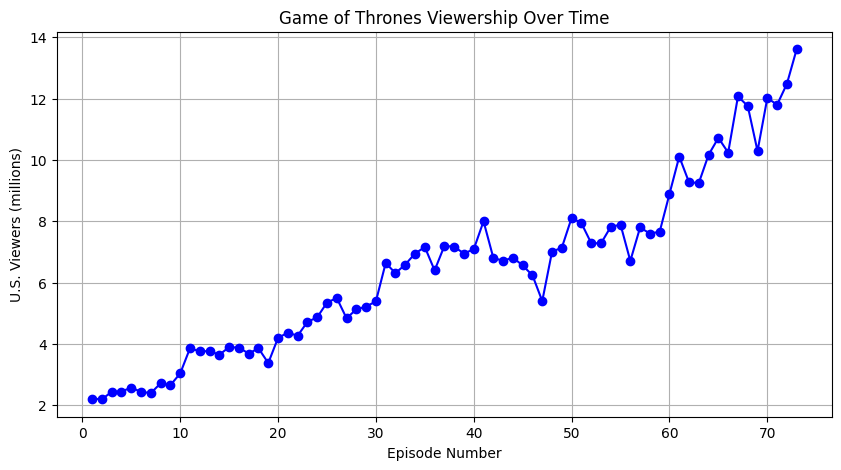

In [20]:
import matplotlib.pyplot as plt

# Plotting viewership over time
plt.figure(figsize=(10, 5))
plt.plot(df['No_overall'], df['Viewers'], marker='o', linestyle='-', color='b')
plt.title('Game of Thrones Viewership Over Time')
plt.xlabel('Episode Number')
plt.ylabel('U.S. Viewers (millions)')
plt.grid(True)
plt.show()


From the graph we can observe an overall increasing trend in viewership. The series starts with viewership numbers around 2 million and rises over the seasons, with a few fluctuations. The peaks in viewership generally coincide with season premieres and finales, which is common in serialized television as interest peaks around these critical episodes. There are also noticeable dips in viewership, which could correspond to mid-season episodes or breaks in the broadcast schedule.

In the final seasons, particularly the last one, there's a significant upward trend with the highest viewership reaching approximately 14 million, indicating peak interest as the series concluded. This suggests a strong audience retention and growing interest as the series progressed.


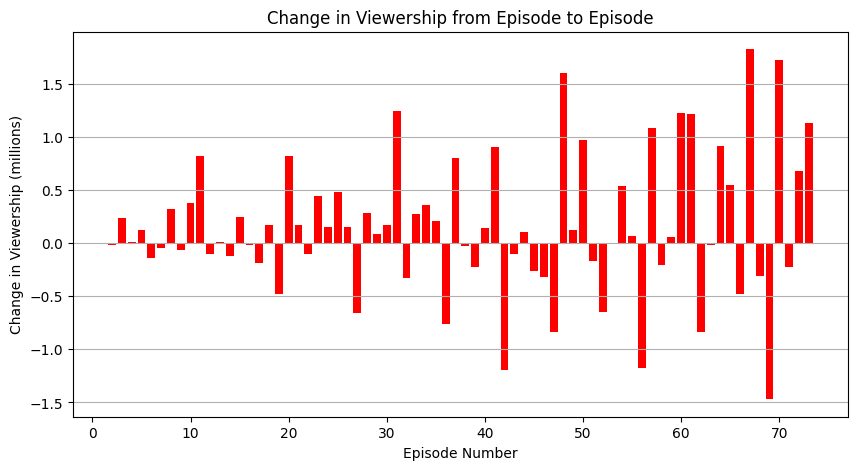

In [21]:
# Calculate change in viewership and plot
df['Viewership Change'] = df['Viewers'].diff()
plt.figure(figsize=(10, 5))
plt.bar(df['No_overall'][1:], df['Viewership Change'][1:], color='r')
plt.title('Change in Viewership from Episode to Episode')
plt.xlabel('Episode Number')
plt.ylabel('Change in Viewership (millions)')
plt.grid(True, axis='y')
plt.show()

This chart shows a series of variations in viewership change between consecutive episodes. The bars above the horizontal axis indicate an increase in viewership compared to the previous episode, while the bars below represent a decrease. The most substantial increases and decreases tend to occur around key episodes, which are likely season premieres, finales, or episodes with significant plot events - this corresponds to what we were able to notice with the previous graph.

The biggest increase episode-to-episode is aroun 1.8 million viewers, while the most significant decrease is around -1.5 million viewers. At the final seasons of the series, the variations in viewership become more pronounced, with larger increases and decreases between episodes. This could be due to the heightened anticipation and interest as the series approached its conclusion, leading to more significant fluctuations in viewership. There were also mixed opinions about the final seasons, which could have contributed to the larger variations in viewership.

There are episodes with a notable increase in viewership, suggesting that these particular episodes might have been highly anticipated or followed major plot twists that drew in viewers. Conversely, some episodes show a considerable drop in viewership, which could be due to various factors such as competing broadcasts, holidays, or perhaps viewer reactions to the previous episodes' content.

## Conclusion

In this project, we scraped data from the Game of Thrones Wikipedia list of episodes page, and analyzed the viewership trends over the series' eight seasons. We observed an overall increasing trend in viewership, with peaks and dips corresponding to key episodes and events in the series. The final seasons showed a significant increase in viewership, indicating strong audience retention and growing interest as the series concluded.

The series' ability to maintain and grow its viewership over time is a testament to its compelling storytelling, complex characters, and richly imagined world.